In [425]:
from sklearn.model_selection import train_test_split
import cv2
import os
import glob
import numpy as np
import joblib
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

WORKPATH = "C:/Users/Johan/Documents/PycharmProjects/MaplestoryM-Assistant"
os.chdir(WORKPATH)

In [426]:
img_path_list = glob.glob("./raw_data/US/status/data/*/*.*", recursive=True)
print(f"Data Size: {len(img_path_list)}")
img_cls = [os.path.basename(os.path.dirname(i)) for i in img_path_list]
classes = list(np.unique(img_cls))
Y = np.zeros((len(img_cls), len(classes)))

for r in range(len(img_cls)):
    Y[r, classes.index(img_cls[r])] = 1

X_img = []
for i in img_path_list:
    img = cv2.imread(i, 0)
    X_img.append(img)
X_img = np.array(X_img)
X_img = X_img.reshape(len(X_img), -1)
print(X_img.shape)

Data Size: 2400
(2400, 3900)


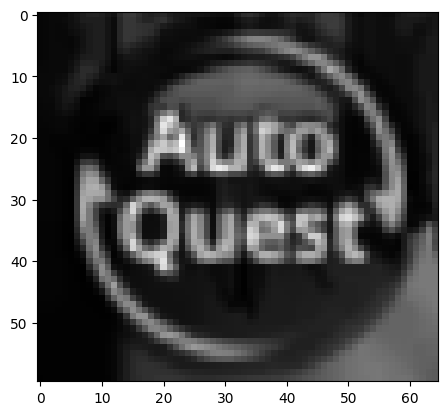

In [427]:
plt.imshow(img, cmap = "gray")

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X_img, img_cls, stratify=img_cls, test_size=0.3, random_state=3)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1680 720 1680 720


In [429]:
AutoQuestNum = 0
AutoBattleNum = 0
for y_train_item in y_train:
    if y_train_item == "AutoQuest":
        AutoQuestNum += 1
    else:
        AutoBattleNum+=1
print(AutoQuestNum, AutoBattleNum)

AutoQuestNum = 0
AutoBattleNum = 0
for y_test_item in y_test:
    if y_test_item == "AutoQuest":
        AutoQuestNum += 1
    else:
        AutoBattleNum+=1
print(AutoQuestNum, AutoBattleNum)

1086 594
466 254


In [430]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [431]:
model.score(X_test, y_test)

0.9958333333333333

In [432]:
results = model.predict(X_test)
results

array(['AutoBattle', 'AutoBattle', 'AutoQuest', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoBattle', 'AutoQuest', 'AutoQuest', 'AutoBattle',
       'AutoQuest', 'AutoBattle', 'AutoBattle', 'AutoBattle',
       'AutoBattle', 'AutoBattle', 'AutoQuest', 'AutoQuest', 'AutoQuest',
       'AutoBattle', 'AutoBattle', 'AutoQuest', 'AutoBattle', 'AutoQuest',
       'AutoBattle', 'AutoBattle', 'AutoQuest', 'AutoBattle',
       'AutoBattle', 'AutoQuest', 'AutoBattle', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoBattle', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoBattle', 'AutoQuest', 'AutoQuest',
       'AutoBattle', 'AutoBattle', 'AutoBattle', 'AutoBattle',
       'AutoBattle', 'AutoBattle', 'AutoBattle', 'AutoQuest',
       'AutoBattle', 'AutoQuest', 'AutoBattle', 'AutoQuest', 'AutoBattle',
       'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoBattle', 'AutoQuest',
       'AutoBattle', 'AutoBattle', 'AutoQuest', 'AutoQuest', 'AutoBattle',
       'Aut

In [433]:
for i in range(len(y_test)):
    if results[i] != y_test[i]:
        print(i, y_test[i], results[i])

60 AutoBattle AutoQuest
279 AutoBattle AutoQuest
586 AutoBattle AutoQuest


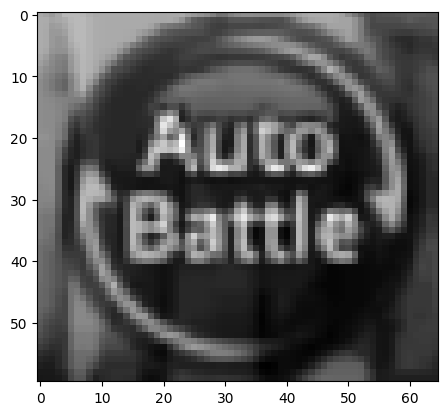

In [434]:
plt.imshow(X_test[251].reshape(60, 65), cmap="gray")

In [435]:
print(results[251])

AutoBattle


C:\Users\Johan\anaconda3\envs\maplestory\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


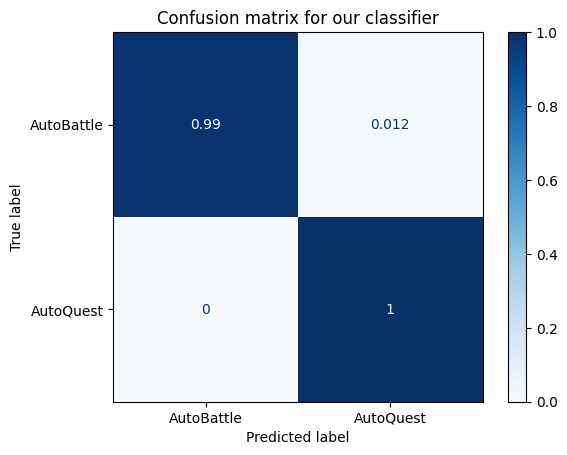

In [436]:
matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [437]:
joblib.dump(model, "./output/ckpt/status-predictor.pkl")

['./output/ckpt/status-predictor.pkl']